# Manifold Learning Introduction

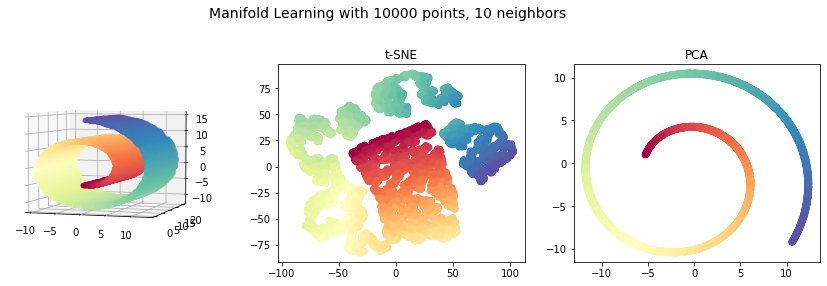

In [17]:
# visualizing some data with the swiss roll dataset to add into the introduction section
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
#This import is needed to silence pyflakes
Axes3D
#Then we load the swiss roll dataset
n_points = 10000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (10000, n_neighbors), fontsize=14)
# Adding 3d scatter plot
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
# Making a dictionary 'methods' containing LLE, t-SNE and PCA
methods = OrderedDict()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    ax = fig.add_subplot(2, 3, 2 + i+(i>1))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title((label))
    ax.axis('tight')
plt.show()

## Credit Card Dataset

Analyzing the clusters of people who fulfill credit card payments on time

In [18]:
import pandas as pd

cc_df = pd.read_csv('Datasets\CC General.csv')
print(cc_df.shape)
nan_count = cc_df.isna().sum().sum()
nan_count

(8950, 18)


314

In [19]:
cols = [i for i in cc_df.columns][1:]

for i in cols:
    cc_df[i].fillna((cc_df[i].mean()), inplace=True)


In [20]:
# fill in the null values with mean along the attribute column
nan_count = cc_df.isna().sum().sum()
nan_count

0

In [21]:
# save to csv
cc_df.to_csv('Datasets\CC GENERAL.csv',index=False)

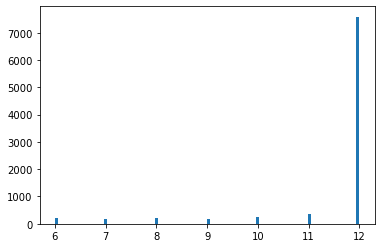

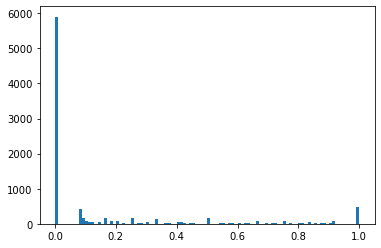

In [41]:
# create clusters of the tensure of credit card usage for a customer
# see if this is possible by extracting distirbution of tenure column --> important to limit imbalance of the data
tenure_data = cc_df['TENURE'].to_list()
plt.hist(tenure_data, bins = 100)
plt.show()  # extremely imbalanced --> cannot efficiently generate clusters for this

# try clusters for the credit limit data
crd_lim = cc_df['PRC_FULL_PAYMENT'].to_list()
plt.hist(crd_lim, bins = 100)
plt.show()

In [43]:
cc_df = cc_df.loc[:, cc_df.columns != 'CUST_ID']

# define function to replace values
def replace_values(x):
    if x == 0:
        return 0
    else:
        return 1

# apply function to column
cc_df['PRC_FULL_PAYMENT'] = cc_df['PRC_FULL_PAYMENT'].apply(replace_values)
cc_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,1,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,1,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,1,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,1,6


Text(0.5, 1.0, 't-SNE applied on Credit Card Data')

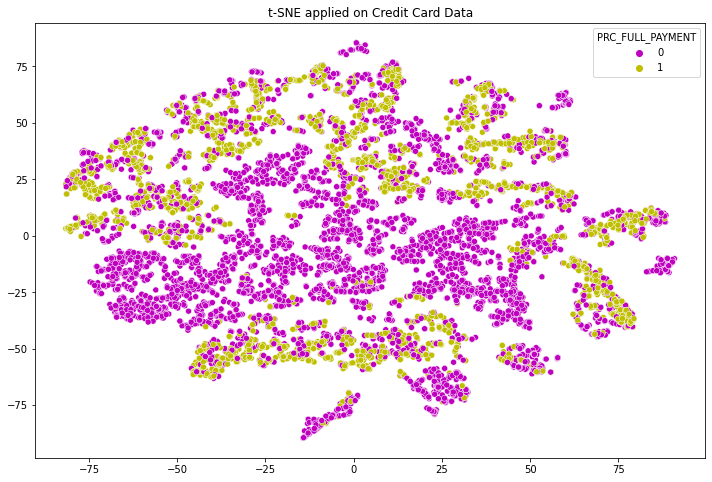

In [50]:
# Apply 2-dimension tsne approx to this dataset
import seaborn as sns
# get subset of the data not include customer ids
label = cc_df['PRC_FULL_PAYMENT']

fig = plt.figure(1, figsize=(12,8))

from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(cc_df)

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue=label, palette = ['m','y'], legend = 'full');
plt.title('t-SNE applied on Credit Card Data')

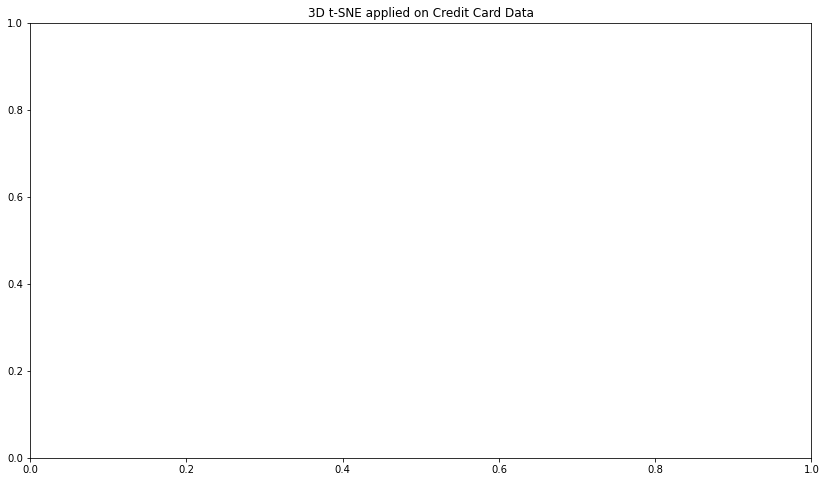

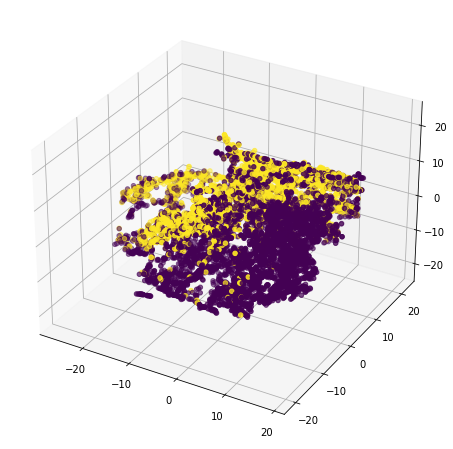

In [48]:
# Apply 3-dimension tsne approx to this dataset
import seaborn as sns
# get subset of the data not include customer ids
label = cc_df['PRC_FULL_PAYMENT']

fig = plt.figure(1, figsize=(14,8))

tsne = TSNE(n_components = 3, random_state=0)
tsne_res = tsne.fit_transform(cc_df)

plt.title('3D t-SNE applied on Credit Card Data')
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")
ax.scatter3D(tsne_res[:, 0], tsne_res[:, 1], tsne_res[:, 2], c=label)
plt.show()

## Loan Default Data

--> 2 actual clusters but will apply on raw data to determine possible number of clusters

In [71]:
loan = pd.read_csv('Datasets\Loan_Data.csv')
# drop all data records with missing values  coded NaN
loan = loan.dropna()
# check updated null values 
nan_count = loan.isna().sum().sum()
loan.drop(['Client_Contact_Work_Tag','Type_Organization'], axis=1)

nan_count

c:\Users\disc2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0

In [65]:
from tqdm import tqdm

In [72]:
categorical_cols = ['Accompany_Client', 'Client_Income_Type','Client_Education','Client_Marital_Status',
                    'Client_Gender','Loan_Contract_Type','Client_Housing_Type','Client_Occupation','Client_Permanent_Match_Tag']
# first step is to apply one hot encoding accorss the discrete, non numerical, variables
# Get one hot encoding of columns B

for i in tqdm(categorical_cols):
    one_hot = pd.get_dummies(loan[i])
    # Drop column B as it is now encoded
    loan = loan.drop(i,axis = 1)
    # Join the encoded df
    loan = loan.join(one_hot)


100%|██████████| 9/9 [00:00<00:00, 88.70it/s]


In [82]:
loan.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'Alone', 'Group', 'Kids', 'Others',
       'Partner', 'Relative', 'Commercial', 'Govt Job', 'Service',
       'Graduation', 'Graduation dropout', 'Junior secondary', 'Post Grad',
       'Secondary', 'D', 'M', 'S', 'W', 'Female', 'Male', 'CL', 'RL', 'Family',
       'Home', 'Municipal', 'Office', 'Rental', 'Shared', 'Accountants',
       'Cleaning', 'Cooking', 'Core', '

In [85]:
loan  = loan.select_dtypes(include=np.number)
loan.shape

(2568, 68)

Text(0.5, 1.0, 't-SNE applied on Vehicle Loan Data')

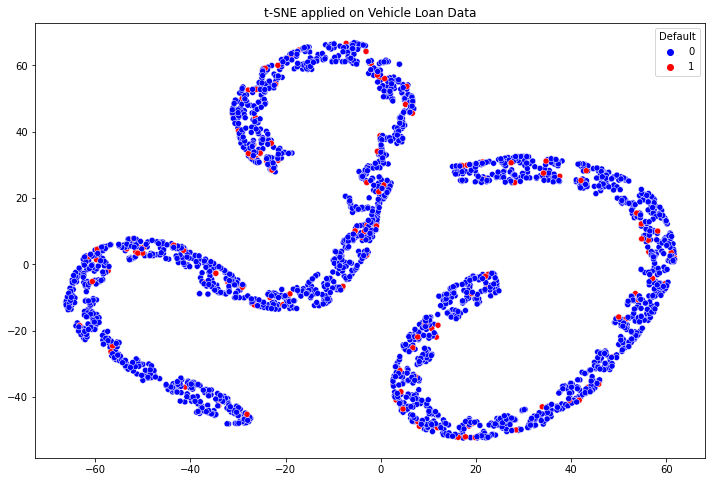

In [86]:
# APPLY SOME TSNE
label = loan['Default']
# Run in parallel with 3 jobs    --> distribution computing resources accross cpu 
fig = plt.figure(1, figsize=(12,8))
tsne = TSNE(n_components = 2, random_state=0, n_jobs = 3)
tsne_res = tsne.fit_transform(loan)
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue=label, palette = ['b','r'], legend = 'full');
plt.title('t-SNE applied on Vehicle Loan Data')

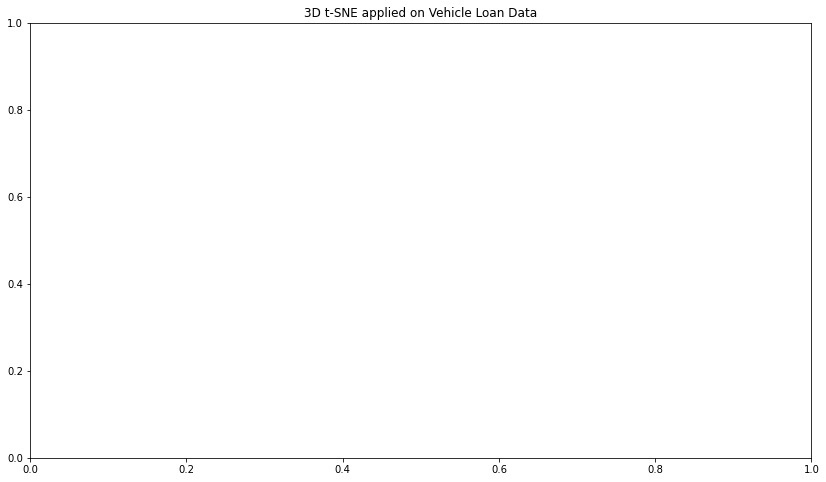

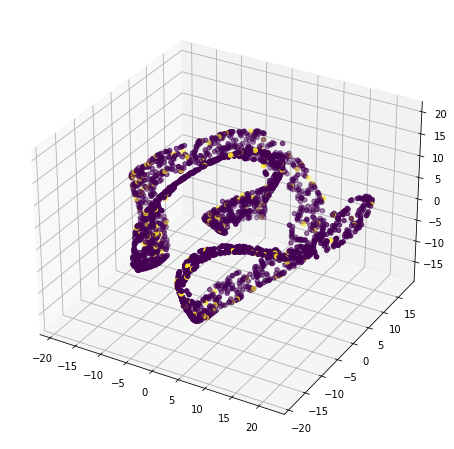

In [87]:
fig = plt.figure(1, figsize=(14,8))

tsne = TSNE(n_components = 3, random_state=0)
tsne_res = tsne.fit_transform(loan)

plt.title('3D t-SNE applied on Vehicle Loan Data')
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")
ax.scatter3D(tsne_res[:, 0], tsne_res[:, 1], tsne_res[:, 2], c=label)
plt.show()

Text(0.5, 1.0, 'PCA applied on Vehicle Loan Data')

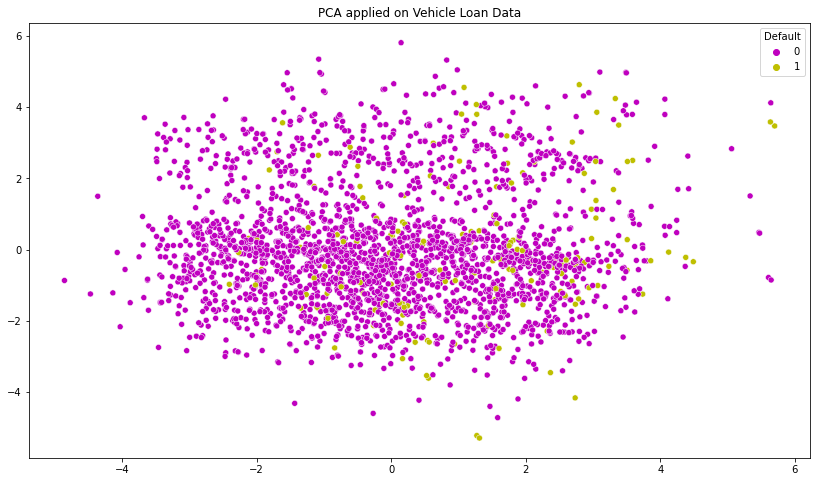

In [88]:
# Apply PCA along this data as well

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
fig = plt.figure(1, figsize=(14,8))

filtered_df = StandardScaler().fit_transform(loan)
pca = PCA(n_components=2)
pca_res = pca.fit_transform(filtered_df)
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = ['m','y'], legend = 'full');
plt.title('PCA applied on Vehicle Loan Data')

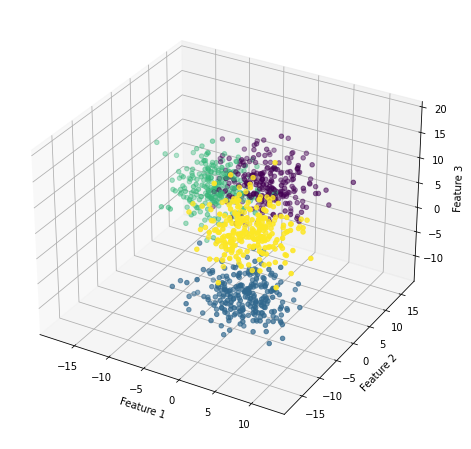

In [47]:
import numpy as np
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=1000, centers=4, n_features=3, random_state=42, cluster_std=3)
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection="3d")
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()
